# Initial Exploration

Author: James Smith 28/11/2019

## Setup

In [1]:
import pandas as pd
import os
# Change working directory for locating dataset
os.chdir("..")

# Libraries for producing images
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
# pd.set_option('display.max_colwidth', 300)

C:\Users\User\Documents\ITB Year 2\Text Analytics and Web Content Mining\Assignments\Assignment 2\Data\overview_dataset.csv


**Setting up environment for images**
- For double column paper images [should be](https://www.sciencemag.org/sites/default/files/Figure_prep_guide.pdf) less than 184mm (7.25 inches) width
- For producing academic style plots the link [here](http://www.jesshamrick.com/2016/04/13/reproducible-plots/) gives some good advice with code.
    - Set the x- and y-axis tick locations and labels
    - Set the x- and y-axis labels
    - Set the subplot and/or figure titles
    - Remove the top and right spines
    - Remove visual tick marks
    - Set the style to be “white” and the context to be “paper”
    - Set the figure size and call plt.tight_layout()


**Configuration to save figures**

In [26]:
# Where to save figures
PROJECT_ROOT_DIR = "."
FOLDER = "notebooks"
IMAGE_FOLDER = "images"

In [ ]:
from genres_from_plot_outline.config import dataset_loc
print(dataset_loc)

In [2]:
def get_main_dataset(loc):
    """
    IMDb ID's sometimes contain a '0' before the ID, thus 
    we must ensure we load it as a string and not a number.
    
    """
    data = pd.read_csv(loc, usecols = ['imdbId', 'title', 'plot_outline', 'genres'], dtype = {'imdbId': str})
    
    return data

In [3]:
data = get_main_dataset(dataset_loc)
data.head()

,imdbId,title,plot_outline,genres
0,0114709,Toy Story,A little boy named Andy loves to be in his roo...,"Animation, Adventure, Comedy, Family, Fantasy"
1,0113497,Jumanji,After being trapped in a jungle board game for...,"Adventure, Comedy, Family, Fantasy"
2,0113228,Grumpier Old Men,Things don't seem to change much in Wabasha Co...,"Comedy, Romance"
3,0114885,Waiting to Exhale,This story based on the best selling novel by ...,"Comedy, Drama, Romance"
4,0113041,Father of the Bride Part II,"In this sequel to ""Father of the Bride"", Georg...","Comedy, Family, Romance"


Check if there are any missing strings

In [4]:
num_blank_title = len(data[data['title'] == ''])
num_blank_plot_outline = len(data[data['plot_outline'] == ''])
num_blank_genres = len(data[data['genres'] == ''])

print("Number of rows with missing title:", num_blank_title)
print("Number of rows with missing plot_outline:", num_blank_plot_outline)
print("Number of rows with missing genres:", num_blank_genres)

Number of rows with missing title: 0
Number of rows with missing plot_outline: 0
Number of rows with missing genres: 0


If we view the genres column, we can see that all genres are all contained in 1 string. We will want to extract this into a list

In [9]:
print("Genres as a string:",data['genres'][0])
print("Genres as a list:", data['genres'][0].replace(',', '').split(" "))

Genres as a string: Animation, Adventure, Comedy, Family, Fantasy
Genres as a list: ['Animation', 'Adventure', 'Comedy', 'Family', 'Fantasy']


In [10]:
def genre_list_extractor(dataset):
    '''
    Creates a column containing the genres as a list
    '''
    data = dataset.copy()
    genres_list = []
    
    for i in data.index:
        genre_string = str(data['genres'][i])
        genre_list = genre_string.replace(',', '').split(" ")
        genres_list.append(genre_list)
        
    data['genre_list'] = genres_list
    return data    

In [11]:
data = genre_list_extractor(data)
data.head()

,imdbId,title,plot_outline,genres,genre_list
0,0114709,Toy Story,A little boy named Andy loves to be in his roo...,"Animation, Adventure, Comedy, Family, Fantasy","[Animation, Adventure, Comedy, Family, Fantasy]"
1,0113497,Jumanji,After being trapped in a jungle board game for...,"Adventure, Comedy, Family, Fantasy","[Adventure, Comedy, Family, Fantasy]"
2,0113228,Grumpier Old Men,Things don't seem to change much in Wabasha Co...,"Comedy, Romance","[Comedy, Romance]"
3,0114885,Waiting to Exhale,This story based on the best selling novel by ...,"Comedy, Drama, Romance","[Comedy, Drama, Romance]"
4,0113041,Father of the Bride Part II,"In this sequel to ""Father of the Bride"", Georg...","Comedy, Family, Romance","[Comedy, Family, Romance]"


## Investigate Genres

In [14]:
total_genres = sum(data['genre_list'], [])
print("There are:", len(set(total_genres)), "genres in the dataset")

There are: 28 genres in the dataset


In the NLTK library there is a `FreqDist()` function that creates a dictionary of their occurances across a column

In [15]:
import nltk

In [16]:
all_genres = nltk.FreqDist(total_genres)

# Create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})
all_genres_df.head()

,Count,Genre
0,3,Reality-TV
1,4095,Action
2,5719,Thriller
3,2287,Sci-Fi
4,1329,History


### Visualise the most commonly used genres

**Helper Functions**

In [89]:
def set_style():
    # This sets reasonable defaults for font size for
    # a figure that will go in a paper
    sns.set_context("paper")
    
    # Set the font to be serif, rather than sans
    sns.set(font='serif')
    
    # Make the background white, and specify the
    # specific font family
    sns.set_style("white", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]
    })
    
def set_size(fig, width = 6, height = 6):
    fig.set_size_inches(width, height)
    # adjust the subplot geometry so not to squish title
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
def save_fig(fig_id):
    """
    Function to automatically save figures 
    with given name - fig_id
    """
    path = os.path.join(PROJECT_ROOT_DIR, FOLDER, IMAGE_FOLDER, fig_id + ".png")
    print("Saving figure", fig_id)
    plt.savefig(path, format='png', dpi=300)

Saving figure Most Common Genres Barplot


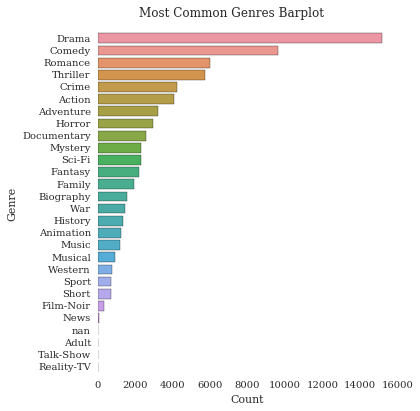

In [92]:
# Master Function for Plotting
def genres_barplot(data, title):
    
    # Set style of project
    set_style()
    
    # Generate visualisation
    ax = sns.barplot(data = data.sort_values(by = "Count", 
                                                  ascending = False),
                                                  x= "Count", y = "Genre")
    fig = plt.gcf()
    
    # Despine axes and add title
    sns.despine(ax=ax, left = True, bottom = True)
    fig.suptitle(title, fontsize=12, x=0.55)
    
    set_size(fig, width = 6, height = 6)
    
    save_fig(title)
    
genres_barplot(all_genres_df, "Most Common Genres Barplot")